In [26]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3077120590673199022
]


[]

In [28]:
 #Loading cifar
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
LABELS = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
HEIGHT = x_train.shape[1]
WIDTH = x_train.shape[2]
print("HEIGHT", HEIGHT)
print("WIDTH", WIDTH)

HEIGHT 32
WIDTH 32


X train shape (50000, 32, 32, 3)
Y train shape (50000, 1)
truck


(<matplotlib.image.AxesImage at 0x29c91d17148>, None)

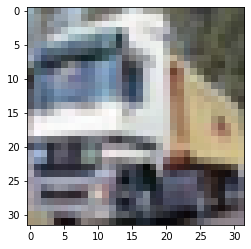

In [29]:
#Checking the ds 
print("X train shape", x_train.shape)
print("Y train shape", y_train.shape)
plt.imshow(x_train[1]), print(labels[y_train[1][0]])

In [44]:
#Let's implement The famous Yann Le Cunn conv nets architectures 
class leNet5(): 
    
    def __init__(self, x_train, y_train, labels): 
        self.model = tf.keras.Sequential()
        self.input_shape = x_train.shape[1::]
        self.labels = labels
        self.x_train = x_train 
        self.y_train = y_train 
        print(self.input_shape)
    
    def build(self): 
        self.model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=28, input_shape=self.input_shape))
        self.model.add(tf.keras.layers.MaxPooling2D())
        
        self.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=10))
        self.model.add(tf.keras.layers.MaxPooling2D())
        
        self.model.add(tf.keras.layers.Dense(units=120, activation="relu"))
        self.model.add(tf.keras.layers.Dense(units=84, activation="relu"))
        self.model.add(tf.keras.layers.Dense(units=len(labels), activation="sigmoid"))
        self.model.compile(optimizer="adam", loss="categorical_crossentropy")
        
    def get_classe(self, idx): 
        return self.labels[idx]
    
    def summary(self): 
        return self.model.summary()
    
    def fit(self): 
        return self.model.fit(self.x_train, self.y_train, batch_size=32, epochs=100) 
    
    def predict(self, x): 
        return self.model.predict(x)
        
    
    #Intializing the model

In [45]:
model = leNet5(x_train, y_train, LABELS)
model.build()

(32, 32, 3)


ValueError: Negative dimension size caused by subtracting 10 from 2 for 'conv2d_9/Conv2D' (op: 'Conv2D') with input shapes: [?,2,2,6], [10,10,6,16].